# Import Required Libraries

In [1]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

# TensorFlow & Keras for LSTM
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Load the dataset

In [2]:
#Loading data into dataframe

data = pd.read_csv("/kaggle/input/phishing-website/phishing.csv")
data.head()

,Index,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
0,0,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
1,1,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
2,2,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
3,3,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1
4,4,-1,0,-1,1,-1,-1,1,1,-1,...,1,1,1,1,1,-1,1,-1,-1,1


In [3]:
#Shape of dataframe

data.shape

(11054, 32)

In [4]:
#Listing the features of the dataset

data.columns

Index(['Index', 'UsingIP', 'LongURL', 'ShortURL', 'Symbol@', 'Redirecting//',
       'PrefixSuffix-', 'SubDomains', 'HTTPS', 'DomainRegLen', 'Favicon',
       'NonStdPort', 'HTTPSDomainURL', 'RequestURL', 'AnchorURL',
       'LinksInScriptTags', 'ServerFormHandler', 'InfoEmail', 'AbnormalURL',
       'WebsiteForwarding', 'StatusBarCust', 'DisableRightClick',
       'UsingPopupWindow', 'IframeRedirection', 'AgeofDomain', 'DNSRecording',
       'WebsiteTraffic', 'PageRank', 'GoogleIndex', 'LinksPointingToPage',
       'StatsReport', 'class'],
      dtype='object')

In [5]:
#Information about the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11054 entries, 0 to 11053
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Index                11054 non-null  int64
 1   UsingIP              11054 non-null  int64
 2   LongURL              11054 non-null  int64
 3   ShortURL             11054 non-null  int64
 4   Symbol@              11054 non-null  int64
 5   Redirecting//        11054 non-null  int64
 6   PrefixSuffix-        11054 non-null  int64
 7   SubDomains           11054 non-null  int64
 8   HTTPS                11054 non-null  int64
 9   DomainRegLen         11054 non-null  int64
 10  Favicon              11054 non-null  int64
 11  NonStdPort           11054 non-null  int64
 12  HTTPSDomainURL       11054 non-null  int64
 13  RequestURL           11054 non-null  int64
 14  AnchorURL            11054 non-null  int64
 15  LinksInScriptTags    11054 non-null  int64
 16  ServerFormHandler    1

In [6]:
# nunique value in columns

data.nunique()

Index                  11054
UsingIP                    2
LongURL                    3
ShortURL                   2
Symbol@                    2
Redirecting//              2
PrefixSuffix-              2
SubDomains                 3
HTTPS                      3
DomainRegLen               2
Favicon                    2
NonStdPort                 2
HTTPSDomainURL             2
RequestURL                 2
AnchorURL                  3
LinksInScriptTags          3
ServerFormHandler          3
InfoEmail                  2
AbnormalURL                2
WebsiteForwarding          2
StatusBarCust              2
DisableRightClick          2
UsingPopupWindow           2
IframeRedirection          2
AgeofDomain                2
DNSRecording               2
WebsiteTraffic             3
PageRank                   2
GoogleIndex                2
LinksPointingToPage        3
StatsReport                2
class                      2
dtype: int64

In [7]:
#droping index column

data = data.drop(['Index'],axis = 1)

In [8]:
#description of dataset

data.describe().T

,count,mean,std,min,25%,50%,75%,max
UsingIP,11054.0,0.313914,0.949495,-1.0,-1.0,1.0,1.0,1.0
LongURL,11054.0,-0.633345,0.765973,-1.0,-1.0,-1.0,-1.0,1.0
ShortURL,11054.0,0.738737,0.674024,-1.0,1.0,1.0,1.0,1.0
Symbol@,11054.0,0.700561,0.713625,-1.0,1.0,1.0,1.0,1.0
Redirecting//,11054.0,0.741632,0.670837,-1.0,1.0,1.0,1.0,1.0
PrefixSuffix-,11054.0,-0.734938,0.678165,-1.0,-1.0,-1.0,-1.0,1.0
SubDomains,11054.0,0.064049,0.817492,-1.0,-1.0,0.0,1.0,1.0
HTTPS,11054.0,0.251040,0.911856,-1.0,-1.0,1.0,1.0,1.0
DomainRegLen,11054.0,-0.336711,0.941651,-1.0,-1.0,-1.0,1.0,1.0
Favicon,11054.0,0.628551,0.777804,-1.0,1.0,1.0,1.0,1.0


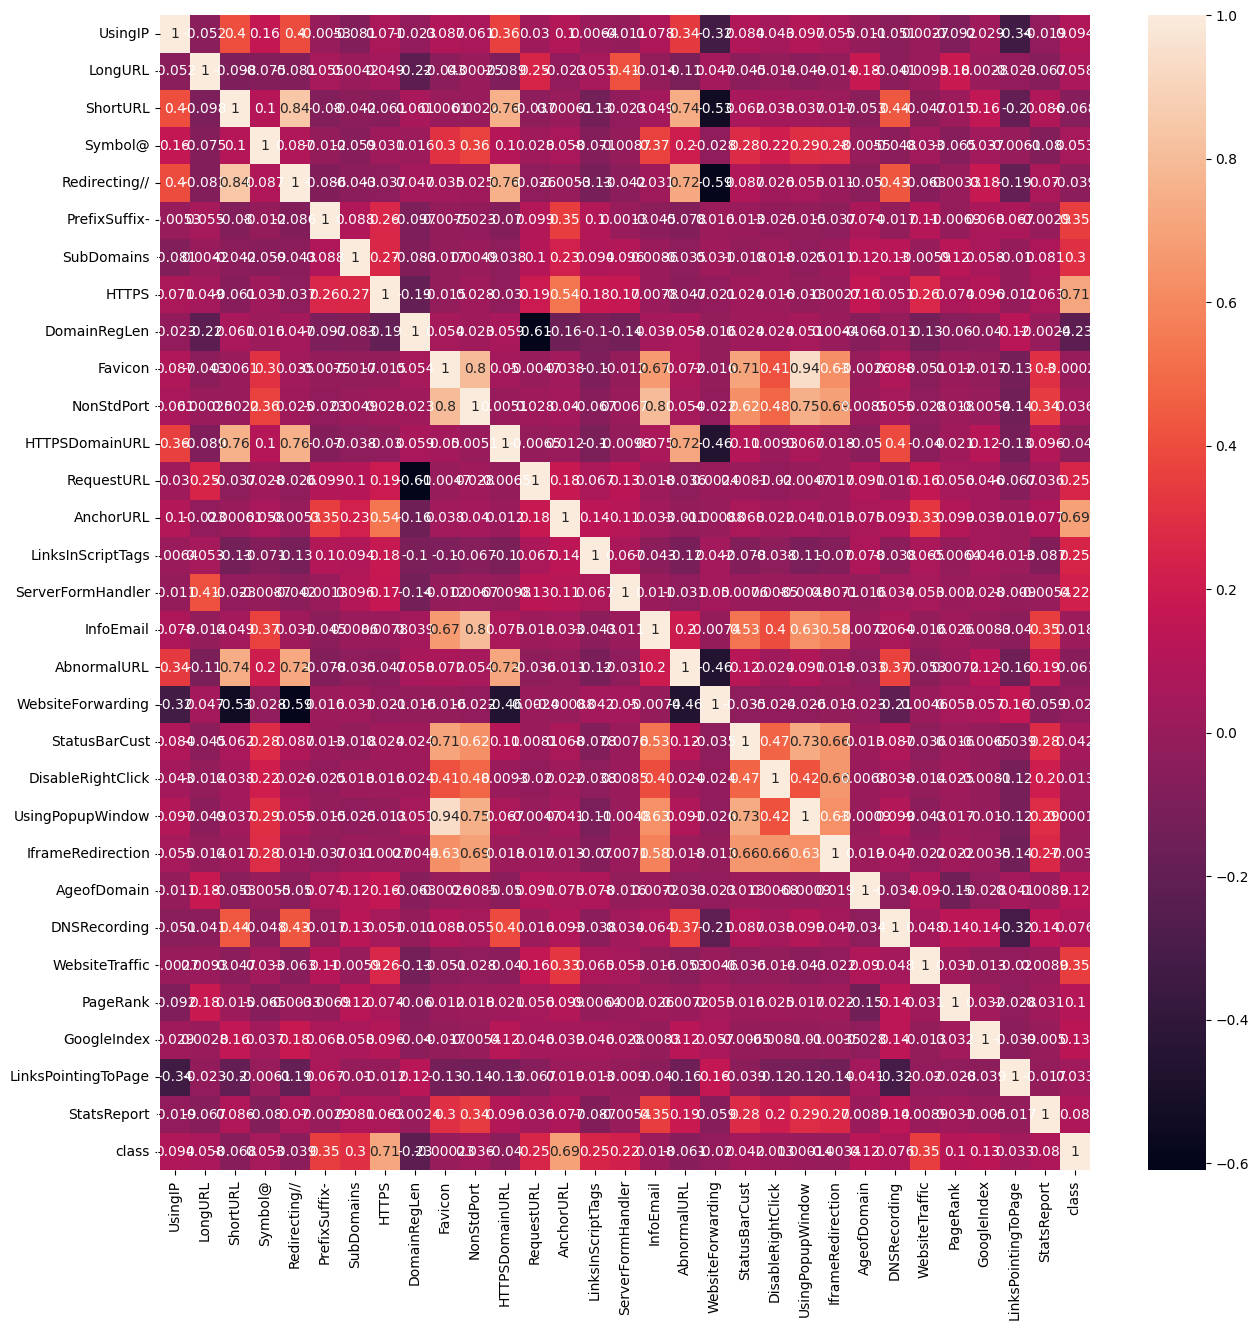

In [9]:
#Correlation heatmap

plt.figure(figsize=(15,15))
sns.heatmap(data.corr(), annot=True)
plt.show()

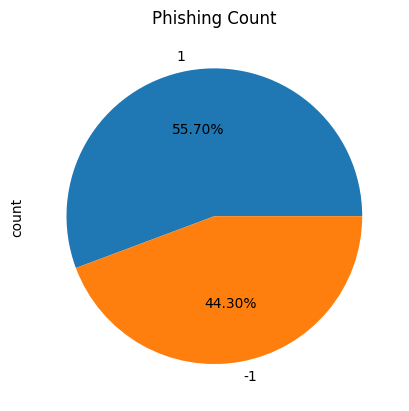

In [9]:
# Phishing Count in pie chart

data['class'].value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.title("Phishing Count")
plt.show()

In [10]:
# Convert Labels (-1 to 0) for Binary Classification
data['class'] = data['class'].replace(-1, 0)

In [11]:
# Splitting the dataset into dependant and independant fetature

X = data.drop(["class"],axis =1)
y = data["class"]

# Split the dataset

In [12]:
# Splitting the dataset into train and test sets: 80-20 split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((8843, 30), (8843,), (2211, 30), (2211,))

# Train DecisionTree Model

In [13]:
# Decision Tree Classifier model 
from sklearn.tree import DecisionTreeClassifier

# instantiate the model 
tree = DecisionTreeClassifier(max_depth=30)

# fit the model 
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=30)

In [14]:
#predicting the target value from the model for the samples

y_train_tree = tree.predict(X_train)
y_test_tree = tree.predict(X_test)

In [15]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_tree = metrics.accuracy_score(y_train,y_train_tree)
acc_test_tree = metrics.accuracy_score(y_test,y_test_tree)
print("Decision Tree : Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree : Accuracy on test Data: {:.3f}".format(acc_test_tree))
print()

f1_score_train_tree = metrics.f1_score(y_train,y_train_tree)
f1_score_test_tree = metrics.f1_score(y_test,y_test_tree)
print("Decision Tree : f1_score on training Data: {:.3f}".format(f1_score_train_tree))
print("Decision Tree : f1_score on test Data: {:.3f}".format(f1_score_test_tree))
print()

recall_score_train_tree = metrics.recall_score(y_train,y_train_tree)
recall_score_test_tree = metrics.recall_score(y_test,y_test_tree)
print("Decision Tree : Recall on training Data: {:.3f}".format(recall_score_train_tree))
print("Decision Tree : Recall on test Data: {:.3f}".format(recall_score_test_tree))
print()

precision_score_train_tree = metrics.precision_score(y_train,y_train_tree)
precision_score_test_tree = metrics.precision_score(y_test,y_test_tree)
print("Decision Tree : precision on training Data: {:.3f}".format(precision_score_train_tree))
print("Decision Tree : precision on test Data: {:.3f}".format(precision_score_test_tree))

Decision Tree : Accuracy on training Data: 0.991
Decision Tree : Accuracy on test Data: 0.960

Decision Tree : f1_score on training Data: 0.992
Decision Tree : f1_score on test Data: 0.964

Decision Tree : Recall on training Data: 0.991
Decision Tree : Recall on test Data: 0.964

Decision Tree : precision on training Data: 0.993
Decision Tree : precision on test Data: 0.965


In [16]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_tree))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95       976
           1       0.97      0.96      0.96      1235

    accuracy                           0.96      2211
   macro avg       0.96      0.96      0.96      2211
weighted avg       0.96      0.96      0.96      2211



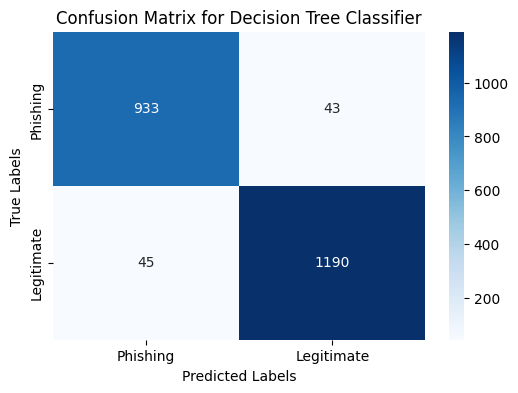

In [17]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_test_tree)

# Define custom class labels
class_labels = ["Phishing", "Legitimate"]

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)

# Labels, title, and axes adjustments
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

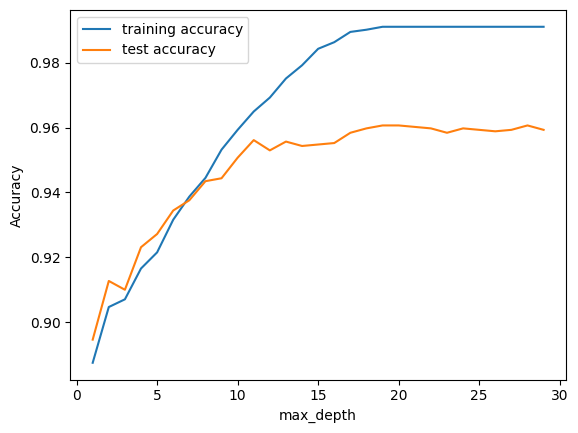

In [18]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 30
depth = range(1,30)
for n in depth:
    tree_test = DecisionTreeClassifier(max_depth=n)

    tree_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(tree_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(tree_test.score(X_test, y_test))
    

#plotting the training & testing accuracy for max_depth from 1 to 30
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("max_depth")
plt.legend();

# Train K-Nearest Neighbors Model

In [19]:
# K-Nearest Neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

# instantiate the model
knn = KNeighborsClassifier(n_neighbors=1)

# fit the model 
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [20]:
#predicting the target value from the model for the samples
y_train_knn = knn.predict(X_train)
y_test_knn = knn.predict(X_test)

In [21]:
#computing the accuracy,f1_score,Recall,precision of the model performance

acc_train_knn = metrics.accuracy_score(y_train,y_train_knn)
acc_test_knn = metrics.accuracy_score(y_test,y_test_knn)
print("K-Nearest Neighbors : Accuracy on training Data: {:.3f}".format(acc_train_knn))
print("K-Nearest Neighbors : Accuracy on test Data: {:.3f}".format(acc_test_knn))
print()

f1_score_train_knn = metrics.f1_score(y_train,y_train_knn)
f1_score_test_knn = metrics.f1_score(y_test,y_test_knn)
print("K-Nearest Neighbors : f1_score on training Data: {:.3f}".format(f1_score_train_knn))
print("K-Nearest Neighbors : f1_score on test Data: {:.3f}".format(f1_score_test_knn))
print()

recall_score_train_knn = metrics.recall_score(y_train,y_train_knn)
recall_score_test_knn = metrics.recall_score(y_test,y_test_knn)
print("K-Nearest Neighborsn : Recall on training Data: {:.3f}".format(recall_score_train_knn))
print("Logistic Regression : Recall on test Data: {:.3f}".format(recall_score_test_knn))
print()

precision_score_train_knn = metrics.precision_score(y_train,y_train_knn)
precision_score_test_knn = metrics.precision_score(y_test,y_test_knn)
print("K-Nearest Neighbors : precision on training Data: {:.3f}".format(precision_score_train_knn))
print("K-Nearest Neighbors : precision on test Data: {:.3f}".format(precision_score_test_knn))

K-Nearest Neighbors : Accuracy on training Data: 0.989
K-Nearest Neighbors : Accuracy on test Data: 0.956

K-Nearest Neighbors : f1_score on training Data: 0.990
K-Nearest Neighbors : f1_score on test Data: 0.961

K-Nearest Neighborsn : Recall on training Data: 0.991
Logistic Regression : Recall on test Data: 0.962

K-Nearest Neighbors : precision on training Data: 0.989
K-Nearest Neighbors : precision on test Data: 0.960


In [22]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_knn))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       976
           1       0.96      0.96      0.96      1235

    accuracy                           0.96      2211
   macro avg       0.96      0.96      0.96      2211
weighted avg       0.96      0.96      0.96      2211



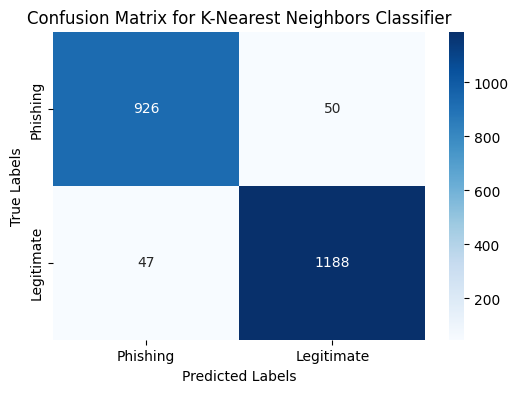

In [23]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_test_knn)

# Define custom class labels
class_labels = ["Phishing", "Legitimate"]

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)

# Labels, title, and axes adjustments
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for K-Nearest Neighbors Classifier')
plt.show()

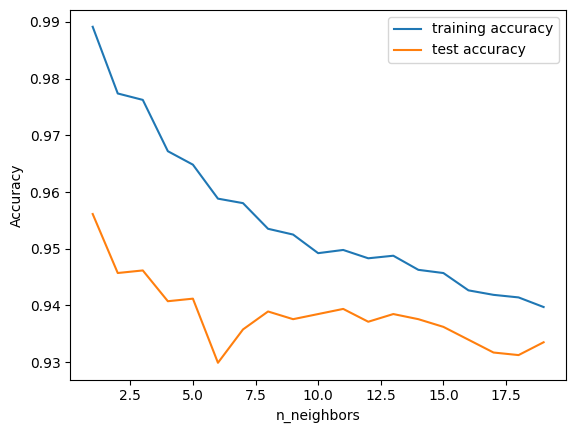

In [24]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 20
depth = range(1,20)
for n in depth:
    knn = KNeighborsClassifier(n_neighbors=n)

    knn.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(knn.score(X_test, y_test))
    

#plotting the training & testing accuracy for n_estimators from 1 to 20
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("n_neighbors")
plt.legend();

# Train SVM Model

In [25]:
# Support Vector Classifier model 
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'gamma': [0.1],'kernel': ['rbf','linear']}

svc = GridSearchCV(SVC(), param_grid)

# fitting the model for grid search
svc.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'gamma': [0.1], 'kernel': ['rbf', 'linear']})

In [26]:
#predicting the target value from the model for the samples
y_train_svc = svc.predict(X_train)
y_test_svc = svc.predict(X_test)

In [27]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_svc = metrics.accuracy_score(y_train,y_train_svc)
acc_test_svc = metrics.accuracy_score(y_test,y_test_svc)
print("Support Vector Machine : Accuracy on training Data: {:.3f}".format(acc_train_svc))
print("Support Vector Machine : Accuracy on test Data: {:.3f}".format(acc_test_svc))
print()

f1_score_train_svc = metrics.f1_score(y_train,y_train_svc)
f1_score_test_svc = metrics.f1_score(y_test,y_test_svc)
print("Support Vector Machine : f1_score on training Data: {:.3f}".format(f1_score_train_svc))
print("Support Vector Machine : f1_score on test Data: {:.3f}".format(f1_score_test_svc))
print()

recall_score_train_svc = metrics.recall_score(y_train,y_train_svc)
recall_score_test_svc = metrics.recall_score(y_test,y_test_svc)
print("Support Vector Machine : Recall on training Data: {:.3f}".format(recall_score_train_svc))
print("Support Vector Machine : Recall on test Data: {:.3f}".format(recall_score_test_svc))
print()

precision_score_train_svc = metrics.precision_score(y_train,y_train_svc)
precision_score_test_svc = metrics.precision_score(y_test,y_test_svc)
print("Support Vector Machine : precision on training Data: {:.3f}".format(precision_score_train_svc))
print("Support Vector Machine : precision on test Data: {:.3f}".format(precision_score_test_svc))

Support Vector Machine : Accuracy on training Data: 0.969
Support Vector Machine : Accuracy on test Data: 0.964

Support Vector Machine : f1_score on training Data: 0.973
Support Vector Machine : f1_score on test Data: 0.968

Support Vector Machine : Recall on training Data: 0.980
Support Vector Machine : Recall on test Data: 0.980

Support Vector Machine : precision on training Data: 0.965
Support Vector Machine : precision on test Data: 0.957


In [28]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_svc))

              precision    recall  f1-score   support

           0       0.97      0.94      0.96       976
           1       0.96      0.98      0.97      1235

    accuracy                           0.96      2211
   macro avg       0.97      0.96      0.96      2211
weighted avg       0.96      0.96      0.96      2211



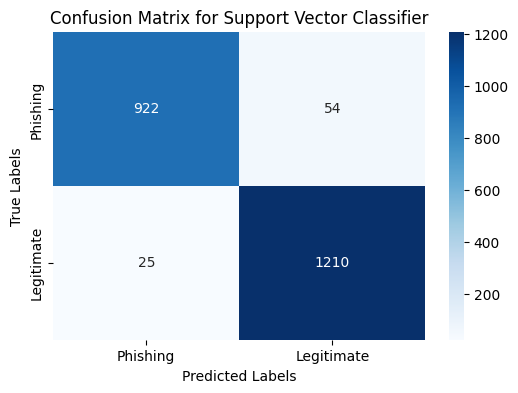

In [29]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_test_svc)

# Define custom class labels
class_labels = ["Phishing", "Legitimate"]

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)

# Labels, title, and axes adjustments
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Support Vector Classifier')
plt.show()

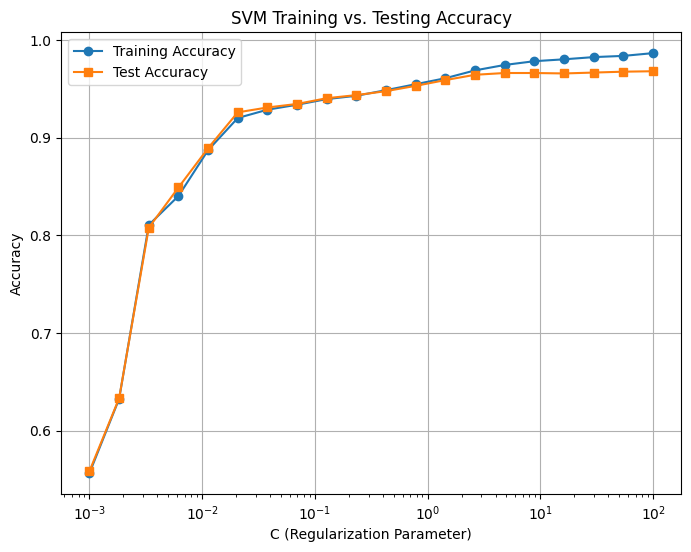

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Assuming X, y are already defined
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features (important for SVM)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Different values of C (regularization parameter) for evaluation
C_values = np.logspace(-3, 2, 20)  # Log scale from 0.001 to 100

training_accuracy = []
test_accuracy = []

# Training SVM with different C values
for C in C_values:
    svm = SVC(kernel='rbf', C=C, gamma='scale', random_state=42)
    svm.fit(X_train, y_train)

    # Record accuracies
    training_accuracy.append(accuracy_score(y_train, svm.predict(X_train)))
    test_accuracy.append(accuracy_score(y_test, svm.predict(X_test)))

# Plot training & testing accuracy
plt.figure(figsize=(8, 6))
plt.plot(C_values, training_accuracy, label="Training Accuracy", marker='o')
plt.plot(C_values, test_accuracy, label="Test Accuracy", marker='s')
plt.xscale('log')  # Log scale for better visualization
plt.xlabel("C (Regularization Parameter)")
plt.ylabel("Accuracy")
plt.title("SVM Training vs. Testing Accuracy")
plt.legend()
plt.grid()
plt.show()


# Train LSTM Model

In [31]:
# Feature Scaling (LSTMs require normalized input)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [32]:
# Reshape Data for LSTM (samples, timesteps=1, features)
X_train_lstm = X_train_scaled.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test_lstm = X_test_scaled.reshape(X_test.shape[0], 1, X_test.shape[1])

In [33]:
# Define LSTM Model
lstm_model = Sequential([
    LSTM(100, return_sequences=True, input_shape=(1, X_train.shape[1])),
    BatchNormalization(),
    Dropout(0.3),
    LSTM(100, return_sequences=False),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [34]:
# Compile the Model
lstm_model.compile(optimizer=Adam(learning_rate=0.0005), loss='binary_crossentropy', metrics=['accuracy'])

# Learning Rate Scheduler
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', patience=5, factor=0.5, verbose=1)

# Train LSTM Model
history = lstm_model.fit(X_train_lstm, y_train, epochs=100, batch_size=32, verbose=1, validation_data=(X_test_lstm, y_test), callbacks=[lr_scheduler])

Epoch 1/100
277/277 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8445 - loss: 0.3834 - val_accuracy: 0.9014 - val_loss: 0.3429 - learning_rate: 5.0000e-04
Epoch 2/100
277/277 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9188 - loss: 0.1961 - val_accuracy: 0.9299 - val_loss: 0.1752 - learning_rate: 5.0000e-04
Epoch 3/100
277/277 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9324 - loss: 0.1680 - val_accuracy: 0.9412 - val_loss: 0.1475 - learning_rate: 5.0000e-04
Epoch 4/100
277/277 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9330 - loss: 0.1632 - val_accuracy: 0.9475 - val_loss: 0.1334 - learning_rate: 5.0000e-04
Epoch 5/100
277/277 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9325 - loss: 0.1595 - val_accuracy: 0.9493 - val_loss: 0.1266 - learning_rate: 5.0000e-04
Epoch 6/100
277/277 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9399 - loss: 0.1486 - val_accuracy: 0.9502 - val_loss: 0.1194 - learning_rate: 5.0000e-04
Epoch 7/100
277/277 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc

In [35]:
# Evaluate Model
y_train_pred = (lstm_model.predict(X_train_lstm) > 0.5).astype("int32")
y_test_pred = (lstm_model.predict(X_test_lstm) > 0.5).astype("int32")

# Compute Performance Metrics
acc_train_lstm = metrics.accuracy_score(y_train, y_train_pred)
acc_test_lstm = metrics.accuracy_score(y_test, y_test_pred)
f1_train_lstm = metrics.f1_score(y_train, y_train_pred)
f1_test_lstm = metrics.f1_score(y_test, y_test_pred)
recall_train_lstm = metrics.recall_score(y_train, y_train_pred)
recall_test_lstm = metrics.recall_score(y_test, y_test_pred)
precision_train_lstm = metrics.precision_score(y_train, y_train_pred)
precision_test_lstm = metrics.precision_score(y_test, y_test_pred)

# Print Results
print("\nLSTM Model Performance:")
print(f"Accuracy on Training Data: {acc_train_lstm:.3f}")
print(f"Accuracy on Test Data: {acc_test_lstm:.3f}")
print(f"F1-score on Training Data: {f1_train_lstm:.3f}")
print(f"F1-score on Test Data: {f1_test_lstm:.3f}")
print(f"Recall on Training Data: {recall_train_lstm:.3f}")
print(f"Recall on Test Data: {recall_test_lstm:.3f}")
print(f"Precision on Training Data: {precision_train_lstm:.3f}")
print(f"Precision on Test Data: {precision_test_lstm:.3f}")

# Compute and Print Classification Report
print("\nClassification Report for LSTM:")
print(metrics.classification_report(y_test, y_test_pred))

277/277 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

LSTM Model Performance:
Accuracy on Training Data: 0.988
Accuracy on Test Data: 0.974
F1-score on Training Data: 0.990
F1-score on Test Data: 0.977
Recall on Training Data: 0.994
Recall on Test Data: 0.988
Precision on Training Data: 0.986
Precision on Test Data: 0.966

Classification Report for LSTM:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       976
           1       0.97      0.99      0.98      1235

    accuracy                           0.97      2211
   macro avg       0.98      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211



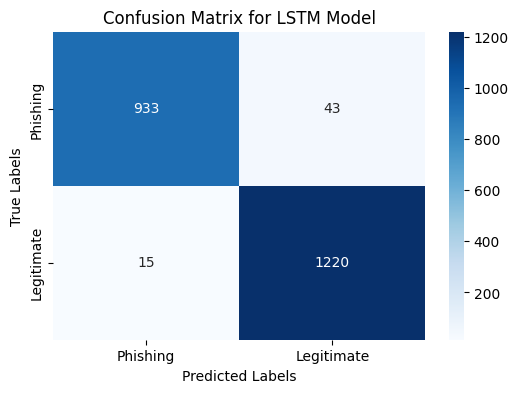

In [36]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Define custom class labels
class_labels = ["Phishing", "Legitimate"]

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)

# Labels, title, and axes adjustments
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for LSTM Model')
plt.show()

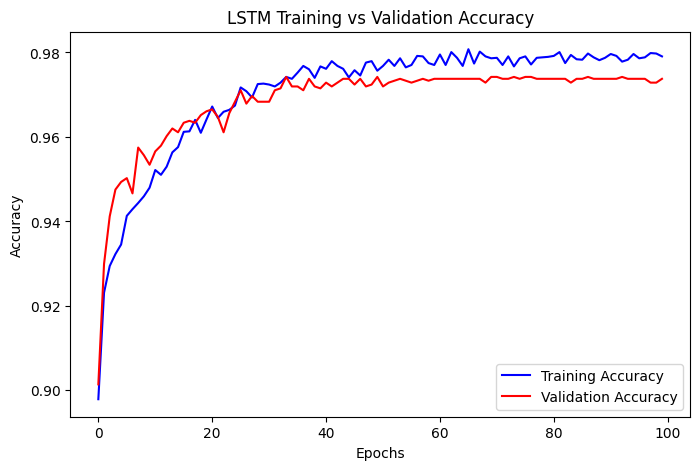

In [37]:
# =========================
# Plot Training Accuracy Curve
# =========================
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label="Training Accuracy", color='blue')
plt.plot(history.history['val_accuracy'], label="Validation Accuracy", color='red')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("LSTM Training vs Validation Accuracy")
plt.legend()
plt.show()

# Train GRU Model

In [38]:
# =========================
# GRU Model (Deep Learning)
# =========================

# Reshape Data for GRU (samples, timesteps=1, features)
X_train_gru = X_train_scaled.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test_gru = X_test_scaled.reshape(X_test.shape[0], 1, X_test.shape[1])

# Define GRU Model
gru_model = Sequential([
    tf.keras.layers.GRU(100, return_sequences=True, input_shape=(1, X_train.shape[1])),
    BatchNormalization(),
    Dropout(0.3),
    tf.keras.layers.GRU(100, return_sequences=False),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [39]:
# Compile the Model
gru_model.compile(optimizer=Adam(learning_rate=0.0005), loss='binary_crossentropy', metrics=['accuracy'])

# Learning Rate Scheduler
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', patience=5, factor=0.5, verbose=1)

# Train GRU Model
history_gru = gru_model.fit(X_train_gru, y_train, epochs=100, batch_size=32, verbose=1, validation_data=(X_test_gru, y_test), callbacks=[lr_scheduler])


Epoch 1/100
277/277 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8591 - loss: 0.3656 - val_accuracy: 0.9073 - val_loss: 0.2787 - learning_rate: 5.0000e-04
Epoch 2/100
277/277 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9160 - loss: 0.1998 - val_accuracy: 0.9267 - val_loss: 0.1730 - learning_rate: 5.0000e-04
Epoch 3/100
277/277 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9261 - loss: 0.1875 - val_accuracy: 0.9385 - val_loss: 0.1489 - learning_rate: 5.0000e-04
Epoch 4/100
277/277 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9307 - loss: 0.1638 - val_accuracy: 0.9466 - val_loss: 0.1280 - learning_rate: 5.0000e-04
Epoch 5/100
277/277 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9345 - loss: 0.1572 - val_accuracy: 0.9457 - val_loss: 0.1288 - learning_rate: 5.0000e-04
Epoch 6/100
277/277 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9344 - loss: 0.1541 - val_accuracy: 0.9539 - val_loss: 0.1150 - learning_rate: 5.0000e-04
Epoch 7/100
277/277 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc

In [40]:
# Evaluate Model
y_train_pred_gru = (gru_model.predict(X_train_gru) > 0.5).astype("int32")
y_test_pred_gru = (gru_model.predict(X_test_gru) > 0.5).astype("int32")

# Compute Performance Metrics
acc_train_gru = metrics.accuracy_score(y_train, y_train_pred_gru)
acc_test_gru = metrics.accuracy_score(y_test, y_test_pred_gru)
f1_train_gru = metrics.f1_score(y_train, y_train_pred_gru)
f1_test_gru = metrics.f1_score(y_test, y_test_pred_gru)
recall_train_gru = metrics.recall_score(y_train, y_train_pred_gru)
recall_test_gru = metrics.recall_score(y_test, y_test_pred_gru)
precision_train_gru = metrics.precision_score(y_train, y_train_pred_gru)
precision_test_gru = metrics.precision_score(y_test, y_test_pred_gru)

# Print Results
print("\nGRU Model Performance:")
print(f"Accuracy on Training Data: {acc_train_gru:.3f}")
print(f"Accuracy on Test Data: {acc_test_gru:.3f}")
print(f"F1-score on Training Data: {f1_train_gru:.3f}")
print(f"F1-score on Test Data: {f1_test_gru:.3f}")
print(f"Recall on Training Data: {recall_train_gru:.3f}")
print(f"Recall on Test Data: {recall_test_gru:.3f}")
print(f"Precision on Training Data: {precision_train_gru:.3f}")
print(f"Precision on Test Data: {precision_test_gru:.3f}")

277/277 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

GRU Model Performance:
Accuracy on Training Data: 0.988
Accuracy on Test Data: 0.970
F1-score on Training Data: 0.989
F1-score on Test Data: 0.973
Recall on Training Data: 0.992
Recall on Test Data: 0.979
Precision on Training Data: 0.987
Precision on Test Data: 0.967


In [41]:
# Compute and Print Classification Report
print("\nClassification Report for GRU:")
print(metrics.classification_report(y_test, y_test_pred_gru))


Classification Report for GRU:
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       976
           1       0.97      0.98      0.97      1235

    accuracy                           0.97      2211
   macro avg       0.97      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211



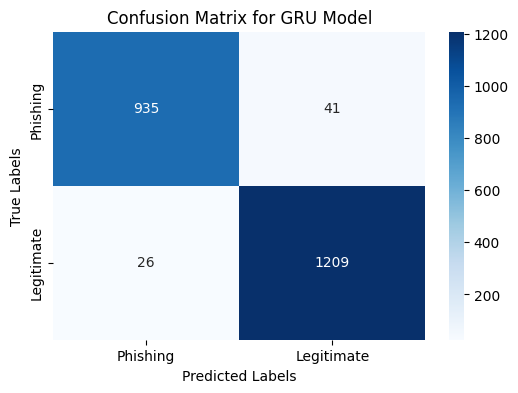

In [42]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_test_pred_gru)

# Define custom class labels
class_labels = ["Phishing", "Legitimate"]

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)

# Labels, title, and axes adjustments
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for GRU Model')
plt.show()

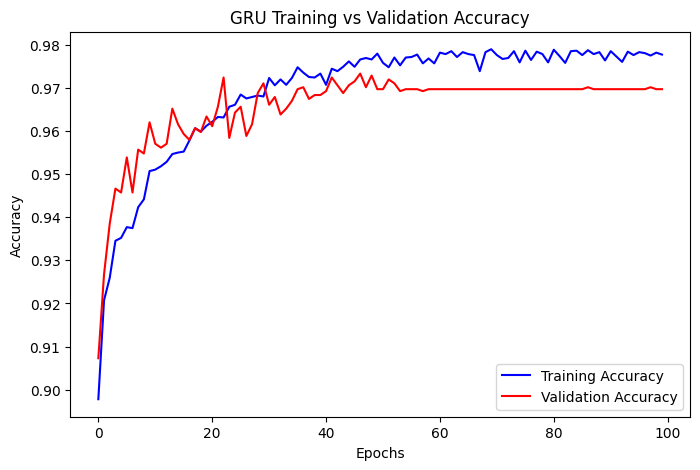

In [43]:
# =========================
# Plot Training Accuracy Curve
# =========================
plt.figure(figsize=(8, 5))
plt.plot(history_gru.history['accuracy'], label="Training Accuracy", color='blue')
plt.plot(history_gru.history['val_accuracy'], label="Validation Accuracy", color='red')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("GRU Training vs Validation Accuracy")
plt.legend()
plt.show()

# Train RNN Model

In [44]:
# =========================
# RNN Model (Deep Learning)
# =========================

# Reshape Data for RNN (samples, timesteps=1, features)
X_train_rnn = X_train_scaled.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test_rnn = X_test_scaled.reshape(X_test.shape[0], 1, X_test.shape[1])

# Define RNN Model
rnn_model = Sequential([
    tf.keras.layers.SimpleRNN(100, return_sequences=True, input_shape=(1, X_train.shape[1])),
    BatchNormalization(),
    Dropout(0.3),
    tf.keras.layers.SimpleRNN(100, return_sequences=False),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [45]:
# Compile the Model
rnn_model.compile(optimizer=Adam(learning_rate=0.0005), loss='binary_crossentropy', metrics=['accuracy'])

# Learning Rate Scheduler
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', patience=5, factor=0.5, verbose=1)

# Train RNN Model
history_rnn = rnn_model.fit(X_train_rnn, y_train, epochs=100, batch_size=32, verbose=1, validation_data=(X_test_rnn, y_test), callbacks=[lr_scheduler])

Epoch 1/100
277/277 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8595 - loss: 0.3462 - val_accuracy: 0.8960 - val_loss: 0.2538 - learning_rate: 5.0000e-04
Epoch 2/100
277/277 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9153 - loss: 0.2124 - val_accuracy: 0.9326 - val_loss: 0.1751 - learning_rate: 5.0000e-04
Epoch 3/100
277/277 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9239 - loss: 0.1986 - val_accuracy: 0.9349 - val_loss: 0.1563 - learning_rate: 5.0000e-04
Epoch 4/100
277/277 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9244 - loss: 0.1911 - val_accuracy: 0.9439 - val_loss: 0.1379 - learning_rate: 5.0000e-04
Epoch 5/100
277/277 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9264 - loss: 0.1891 - val_accuracy: 0.9394 - val_loss: 0.1339 - learning_rate: 5.0000e-04
Epoch 6/100
277/277 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9354 - loss: 0.1651 - val_accuracy: 0.9389 - val_loss: 0.1408 - learning_rate: 5.0000e-04
Epoch 7/100
277/277 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc

In [46]:
# Evaluate Model
y_train_pred_rnn = (rnn_model.predict(X_train_rnn) > 0.5).astype("int32")
y_test_pred_rnn = (rnn_model.predict(X_test_rnn) > 0.5).astype("int32")

# Compute Performance Metrics
acc_train_rnn = metrics.accuracy_score(y_train, y_train_pred_rnn)
acc_test_rnn = metrics.accuracy_score(y_test, y_test_pred_rnn)
f1_train_rnn = metrics.f1_score(y_train, y_train_pred_rnn)
f1_test_rnn = metrics.f1_score(y_test, y_test_pred_rnn)
recall_train_rnn = metrics.recall_score(y_train, y_train_pred_rnn)
recall_test_rnn = metrics.recall_score(y_test, y_test_pred_rnn)
precision_train_rnn = metrics.precision_score(y_train, y_train_pred_rnn)
precision_test_rnn = metrics.precision_score(y_test, y_test_pred_rnn)

# Print Results
print("\nRNN Model Performance:")
print(f"Accuracy on Training Data: {acc_train_rnn:.3f}")
print(f"Accuracy on Test Data: {acc_test_rnn:.3f}")
print(f"F1-score on Training Data: {f1_train_rnn:.3f}")
print(f"F1-score on Test Data: {f1_test_rnn:.3f}")
print(f"Recall on Training Data: {recall_train_rnn:.3f}")
print(f"Recall on Test Data: {recall_test_rnn:.3f}")
print(f"Precision on Training Data: {precision_train_rnn:.3f}")
print(f"Precision on Test Data: {precision_test_rnn:.3f}")

277/277 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

RNN Model Performance:
Accuracy on Training Data: 0.988
Accuracy on Test Data: 0.974
F1-score on Training Data: 0.990
F1-score on Test Data: 0.977
Recall on Training Data: 0.992
Recall on Test Data: 0.985
Precision on Training Data: 0.987
Precision on Test Data: 0.968


In [47]:
# Compute and Print Classification Report
print("\nClassification Report for RNN:")
print(metrics.classification_report(y_test, y_test_pred_rnn))


Classification Report for RNN:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       976
           1       0.97      0.99      0.98      1235

    accuracy                           0.97      2211
   macro avg       0.97      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211



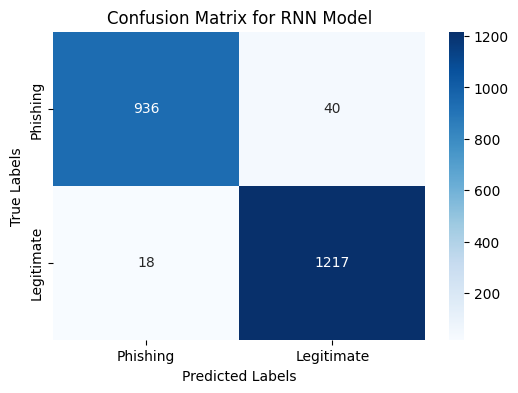

In [48]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_test_pred_rnn)

# Define custom class labels
class_labels = ["Phishing", "Legitimate"]

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)

# Labels, title, and axes adjustments
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for RNN Model')
plt.show()

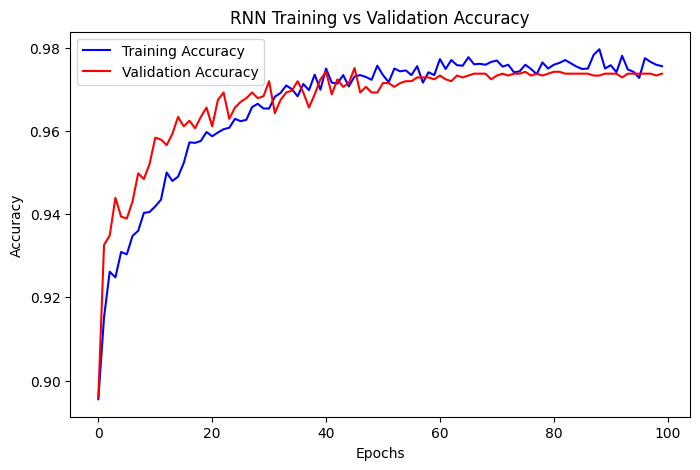

In [49]:
# =========================
# Plot Training Accuracy Curve
# =========================
plt.figure(figsize=(8, 5))
plt.plot(history_rnn.history['accuracy'], label="Training Accuracy", color='blue')
plt.plot(history_rnn.history['val_accuracy'], label="Validation Accuracy", color='red')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("RNN Training vs Validation Accuracy")
plt.legend()
plt.show()

# Train RandomForest Model

In [50]:
# =========================
# Random Forest (Ensemble Learning)
# =========================

from sklearn.ensemble import RandomForestClassifier

# Instantiate the model (Hyperparameters as per Research Paper)
rf_model = RandomForestClassifier(n_estimators=100, max_depth=30, random_state=42, n_jobs=-1)

# Train the model
rf_model.fit(X_train, y_train)

# Predict the target values
y_train_pred_rf = rf_model.predict(X_train)
y_test_pred_rf = rf_model.predict(X_test)

In [51]:
# Compute Performance Metrics
acc_train_rf = metrics.accuracy_score(y_train, y_train_pred_rf)
acc_test_rf = metrics.accuracy_score(y_test, y_test_pred_rf)
f1_train_rf = metrics.f1_score(y_train, y_train_pred_rf)
f1_test_rf = metrics.f1_score(y_test, y_test_pred_rf)
recall_train_rf = metrics.recall_score(y_train, y_train_pred_rf)
recall_test_rf = metrics.recall_score(y_test, y_test_pred_rf)
precision_train_rf = metrics.precision_score(y_train, y_train_pred_rf)
precision_test_rf = metrics.precision_score(y_test, y_test_pred_rf)

# Print Results
print("\nRandom Forest Model Performance:")
print(f"Accuracy on Training Data: {acc_train_rf:.3f}")
print(f"Accuracy on Test Data: {acc_test_rf:.3f}")
print(f"F1-score on Training Data: {f1_train_rf:.3f}")
print(f"F1-score on Test Data: {f1_test_rf:.3f}")
print(f"Recall on Training Data: {recall_train_rf:.3f}")
print(f"Recall on Test Data: {recall_test_rf:.3f}")
print(f"Precision on Training Data: {precision_train_rf:.3f}")
print(f"Precision on Test Data: {precision_test_rf:.3f}")


Random Forest Model Performance:
Accuracy on Training Data: 0.991
Accuracy on Test Data: 0.969
F1-score on Training Data: 0.992
F1-score on Test Data: 0.973
Recall on Training Data: 0.993
Recall on Test Data: 0.977
Precision on Training Data: 0.991
Precision on Test Data: 0.969


In [52]:
# Compute and Print Classification Report
print("\nClassification Report for Random Forest:")
print(metrics.classification_report(y_test, y_test_pred_rf))


Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       976
           1       0.97      0.98      0.97      1235

    accuracy                           0.97      2211
   macro avg       0.97      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211



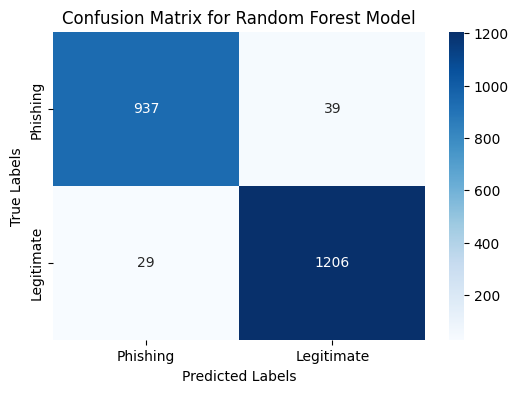

In [53]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the confusion matrix
cm_rf = confusion_matrix(y_test, y_test_pred_rf)

# Define custom class labels
class_labels = ["Phishing", "Legitimate"]

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)

# Labels, title, and axes adjustments
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

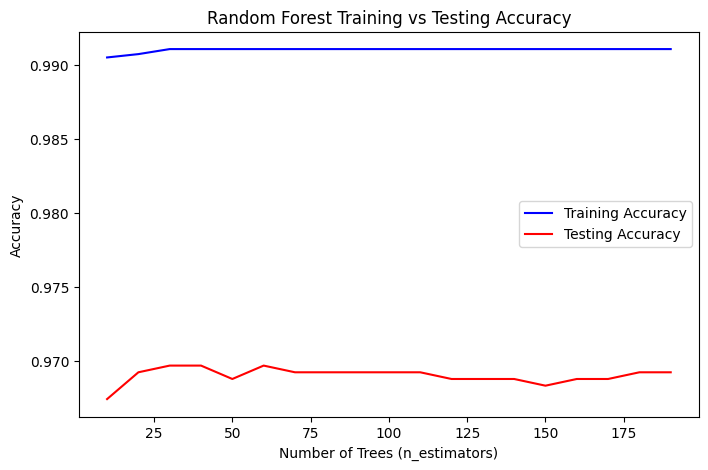

In [54]:
# =========================
# Plot Training vs Testing Accuracy Curve
# =========================
training_accuracy = []
test_accuracy = []
# Try n_estimators from 10 to 200
n_estimators_range = range(10, 200, 10)
for n in n_estimators_range:
    rf_test = RandomForestClassifier(n_estimators=n, max_depth=30, random_state=42, n_jobs=-1)
    rf_test.fit(X_train, y_train)
    training_accuracy.append(rf_test.score(X_train, y_train))
    test_accuracy.append(rf_test.score(X_test, y_test))

# Plot Accuracy Curve
plt.figure(figsize=(8, 5))
plt.plot(n_estimators_range, training_accuracy, label="Training Accuracy", color='blue')
plt.plot(n_estimators_range, test_accuracy, label="Testing Accuracy", color='red')
plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("Accuracy")
plt.title("Random Forest Training vs Testing Accuracy")
plt.legend()
plt.show()

# Train AdaBoost Model

In [55]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

# Define Parameter Grid for Optimization
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.1, 0.3, 0.5, 1.0],
    'base_estimator__max_depth': [2, 3, 5]
}

# Perform GridSearchCV
grid_search = GridSearchCV(
    AdaBoostClassifier(base_estimator=DecisionTreeClassifier()),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Train with Grid Search
grid_search.fit(X_train, y_train)

# Print Best Parameters
print("Best Parameters for AdaBoost:", grid_search.best_params_)

# Use Best Parameters for AdaBoost
ada_model = AdaBoostClassifier(
    base_estimator=DecisionTreeClassifier(max_depth=grid_search.best_params_['base_estimator__max_depth']),
    n_estimators=grid_search.best_params_['n_estimators'],
    learning_rate=grid_search.best_params_['learning_rate'],
    random_state=42
)

# Train Optimized AdaBoost Model
ada_model.fit(X_train, y_train)

# Predict the Target Values
y_train_pred_ada = ada_model.predict(X_train)
y_test_pred_ada = ada_model.predict(X_test)

Best Parameters for AdaBoost: {'base_estimator__max_depth': 5, 'learning_rate': 1.0, 'n_estimators': 200}


In [56]:
# Compute Performance Metrics
acc_train_ada = metrics.accuracy_score(y_train, y_train_pred_ada)
acc_test_ada = metrics.accuracy_score(y_test, y_test_pred_ada)
f1_train_ada = metrics.f1_score(y_train, y_train_pred_ada)
f1_test_ada = metrics.f1_score(y_test, y_test_pred_ada)
recall_train_ada = metrics.recall_score(y_train, y_train_pred_ada)
recall_test_ada = metrics.recall_score(y_test, y_test_pred_ada)
precision_train_ada = metrics.precision_score(y_train, y_train_pred_ada)
precision_test_ada = metrics.precision_score(y_test, y_test_pred_ada)

# Print Results
print("\nOptimized AdaBoost Model Performance:")
print(f"Accuracy on Training Data: {acc_train_ada:.3f}")
print(f"Accuracy on Test Data: {acc_test_ada:.3f}")
print(f"F1-score on Training Data: {f1_train_ada:.3f}")
print(f"F1-score on Test Data: {f1_test_ada:.3f}")
print(f"Recall on Training Data: {recall_train_ada:.3f}")
print(f"Recall on Test Data: {recall_test_ada:.3f}")
print(f"Precision on Training Data: {precision_train_ada:.3f}")
print(f"Precision on Test Data: {precision_test_ada:.3f}")


Optimized AdaBoost Model Performance:
Accuracy on Training Data: 0.991
Accuracy on Test Data: 0.968
F1-score on Training Data: 0.992
F1-score on Test Data: 0.971
Recall on Training Data: 0.995
Recall on Test Data: 0.980
Precision on Training Data: 0.989
Precision on Test Data: 0.963


In [57]:
# Compute and Print Classification Report
print("\nClassification Report for Optimized AdaBoost:")
print(metrics.classification_report(y_test, y_test_pred_ada))


Classification Report for Optimized AdaBoost:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       976
           1       0.96      0.98      0.97      1235

    accuracy                           0.97      2211
   macro avg       0.97      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211



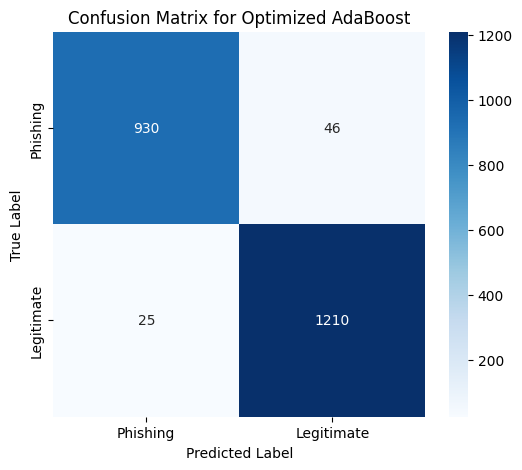

In [58]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred_ada)

# Define Class Labels
class_labels = ["Phishing", "Legitimate"]

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Optimized AdaBoost")
plt.show()

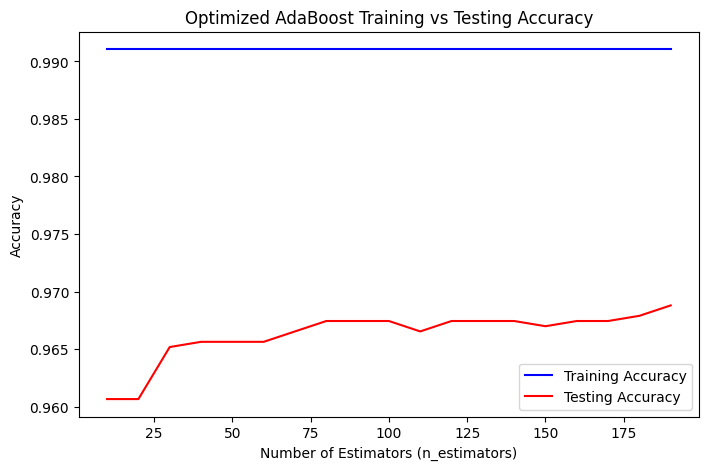

In [59]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Define base estimator (weak learner)
base_estimator = DecisionTreeClassifier(max_depth=30)

# Store accuracy values
training_accuracy = []
test_accuracy = []

# Try n_estimators from 10 to 200
n_estimators_range = range(10, 200, 10)

for n in n_estimators_range:
    ada_test = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=n, learning_rate=0.5, random_state=42)
    ada_test.fit(X_train, y_train)
    training_accuracy.append(ada_test.score(X_train, y_train))
    test_accuracy.append(ada_test.score(X_test, y_test))

# Plot Accuracy Curve
plt.figure(figsize=(8, 5))
plt.plot(n_estimators_range, training_accuracy, label="Training Accuracy", color='blue')
plt.plot(n_estimators_range, test_accuracy, label="Testing Accuracy", color='red')
plt.xlabel("Number of Estimators (n_estimators)")
plt.ylabel("Accuracy")
plt.title("Optimized AdaBoost Training vs Testing Accuracy")
plt.legend()
plt.show()

# Train XGBoost Model

In [60]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

# Define Parameter Grid for Optimization
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [4, 6, 8, 10],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

# Perform GridSearchCV
grid_search = GridSearchCV(
    XGBClassifier(use_label_encoder=False, eval_metric="logloss"),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Train with Grid Search
grid_search.fit(X_train, y_train)

# Print Best Parameters
print("Best Parameters for XGBoost:", grid_search.best_params_)

# Use Best Parameters for XGBoost
xgb_model = XGBClassifier(
    n_estimators=grid_search.best_params_['n_estimators'],
    learning_rate=grid_search.best_params_['learning_rate'],
    max_depth=grid_search.best_params_['max_depth'],
    subsample=grid_search.best_params_['subsample'],
    colsample_bytree=grid_search.best_params_['colsample_bytree'],
    random_state=42,
    use_label_encoder=False,
    eval_metric="logloss"
)

# Train Optimized XGBoost Model
xgb_model.fit(X_train, y_train)

# Predict the Target Values
y_train_pred_xgb = xgb_model.predict(X_train)
y_test_pred_xgb = xgb_model.predict(X_test)

Best Parameters for XGBoost: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 200, 'subsample': 1.0}


In [61]:
# Compute Performance Metrics
acc_train_xgb = metrics.accuracy_score(y_train, y_train_pred_xgb)
acc_test_xgb = metrics.accuracy_score(y_test, y_test_pred_xgb)
f1_train_xgb = metrics.f1_score(y_train, y_train_pred_xgb)
f1_test_xgb = metrics.f1_score(y_test, y_test_pred_xgb)
recall_train_xgb = metrics.recall_score(y_train, y_train_pred_xgb)
recall_test_xgb = metrics.recall_score(y_test, y_test_pred_xgb)
precision_train_xgb = metrics.precision_score(y_train, y_train_pred_xgb)
precision_test_xgb = metrics.precision_score(y_test, y_test_pred_xgb)

# Print Results
print("\nOptimized XGBoost Model Performance:")
print(f"Accuracy on Training Data: {acc_train_xgb:.3f}")
print(f"Accuracy on Test Data: {acc_test_xgb:.3f}")
print(f"F1-score on Training Data: {f1_train_xgb:.3f}")
print(f"F1-score on Test Data: {f1_test_xgb:.3f}")
print(f"Recall on Training Data: {recall_train_xgb:.3f}")
print(f"Recall on Test Data: {recall_test_xgb:.3f}")
print(f"Precision on Training Data: {precision_train_xgb:.3f}")
print(f"Precision on Test Data: {precision_test_xgb:.3f}")


Optimized XGBoost Model Performance:
Accuracy on Training Data: 0.990
Accuracy on Test Data: 0.970
F1-score on Training Data: 0.991
F1-score on Test Data: 0.973
Recall on Training Data: 0.994
Recall on Test Data: 0.981
Precision on Training Data: 0.989
Precision on Test Data: 0.966


In [62]:
# Compute and Print Classification Report
print("\nClassification Report for Optimized XGBoost:")
print(metrics.classification_report(y_test, y_test_pred_xgb))


Classification Report for Optimized XGBoost:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       976
           1       0.97      0.98      0.97      1235

    accuracy                           0.97      2211
   macro avg       0.97      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211



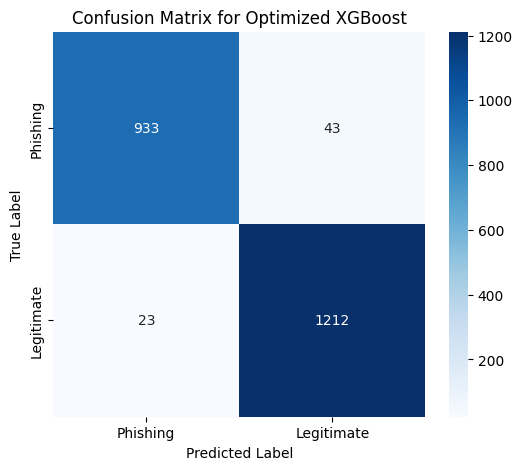

In [63]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute Confusion Matrix
conf_matrix_xgb = confusion_matrix(y_test, y_test_pred_xgb)

# Define Class Labels
class_labels = ["Phishing", "Legitimate"]

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Optimized XGBoost")
plt.show()

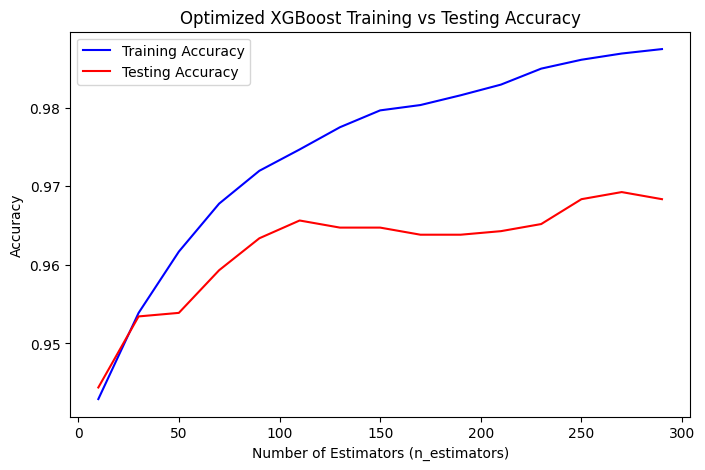

In [64]:
# =========================
# Plot Training vs Testing Accuracy Curve
# =========================
training_accuracy = []
test_accuracy = []
# Try n_estimators from 10 to 300
n_estimators_range = range(10, 300, 20)
for n in n_estimators_range:
    xgb_test = XGBClassifier(n_estimators=n, learning_rate=0.1, max_depth=6, subsample=0.8, colsample_bytree=0.8, random_state=42, use_label_encoder=False, eval_metric="logloss")
    xgb_test.fit(X_train, y_train)
    training_accuracy.append(xgb_test.score(X_train, y_train))
    test_accuracy.append(xgb_test.score(X_test, y_test))

# Plot Accuracy Curve
plt.figure(figsize=(8, 5))
plt.plot(n_estimators_range, training_accuracy, label="Training Accuracy", color='blue')
plt.plot(n_estimators_range, test_accuracy, label="Testing Accuracy", color='red')
plt.xlabel("Number of Estimators (n_estimators)")
plt.ylabel("Accuracy")
plt.title("Optimized XGBoost Training vs Testing Accuracy")
plt.legend()
plt.show()

# Accuracy Comparison for All Models

Accuracy Comparison for All Models:
                 Model  Train Accuracy  Test Accuracy
0        Decision Tree        0.991066       0.960199
1  K-Nearest Neighbors        0.989144       0.956128
2                  SVM        0.969354       0.964270
3                 LSTM        0.988465       0.973768
4                  GRU        0.988126       0.969697
5                  RNN        0.988465       0.973768
6        Random Forest        0.991066       0.969245
7             AdaBoost        0.991066       0.967888
8              XGBoost        0.990162       0.970149


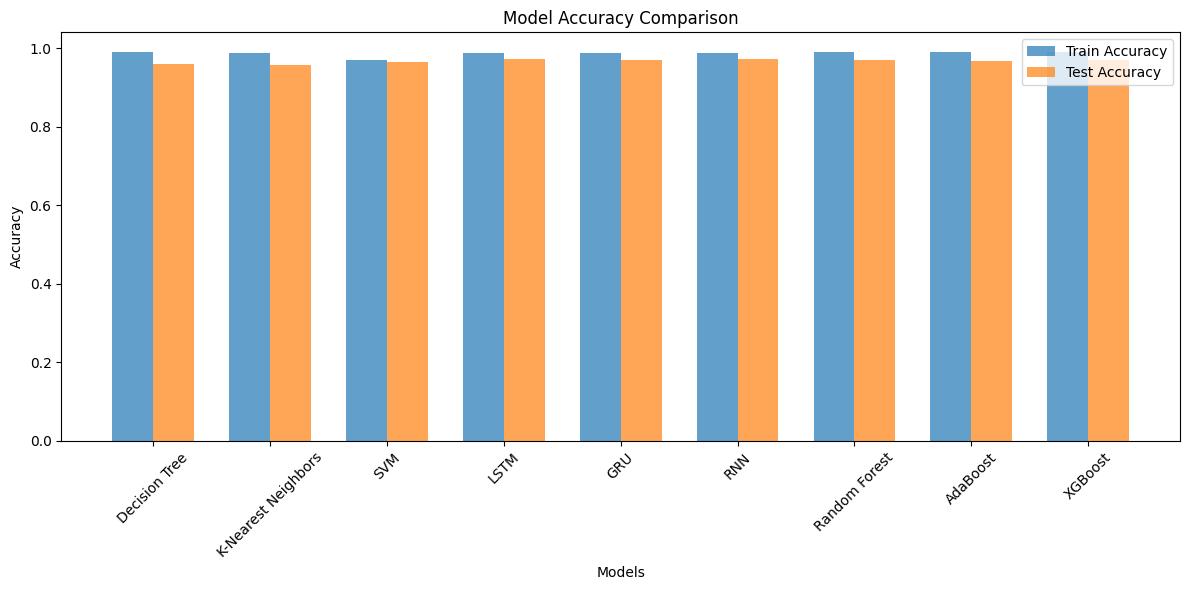

In [65]:
# Accuracy Comparison for All Trained Models

# List of model names and their corresponding accuracies
models = [
    'Decision Tree',
    'K-Nearest Neighbors',
    'SVM',
    'LSTM',
    'GRU',
    'RNN',
    'Random Forest',
    'AdaBoost',
    'XGBoost'
]

train_accuracies = [
    acc_train_tree,
    acc_train_knn,
    acc_train_svc,
    acc_train_lstm,
    acc_train_gru,
    acc_train_rnn,
    acc_train_rf,
    acc_train_ada,
    acc_train_xgb
]

test_accuracies = [
    acc_test_tree,
    acc_test_knn,
    acc_test_svc,
    acc_test_lstm,
    acc_test_gru,
    acc_test_rnn,
    acc_test_rf,
    acc_test_ada,
    acc_test_xgb
]

# Create a DataFrame to display the accuracies
accuracy_df = pd.DataFrame({
    'Model': models,
    'Train Accuracy': train_accuracies,
    'Test Accuracy': test_accuracies
})

print("Accuracy Comparison for All Models:")
print(accuracy_df)

# Plotting the accuracy comparison as a bar chart
plt.figure(figsize=(12, 6))
bar_width = 0.35
indices = np.arange(len(models))

plt.bar(indices, train_accuracies, bar_width, label='Train Accuracy', alpha=0.7)
plt.bar(indices + bar_width, test_accuracies, bar_width, label='Test Accuracy', alpha=0.7)

plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.xticks(indices + bar_width / 2, models, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Comparison of Test-Set Performance Metrics

In [66]:
import pandas as pd

# Create a DataFrame to compare test-set performance for all models
comparison_df = pd.DataFrame({
    "Models": [
        "Decision Tree", 
        "K-Nearest Neighbors", 
        "Support Vector Machine", 
        "LSTM", 
        "GRU", 
        "RNN", 
        "Random Forest", 
        "AdaBoost", 
        "XGBoost"
    ],
    "Accuracy": [
        acc_test_tree, 
        acc_test_knn, 
        acc_test_svc, 
        acc_test_lstm, 
        acc_test_gru, 
        acc_test_rnn, 
        acc_test_rf, 
        acc_test_ada, 
        acc_test_xgb
    ],
    "f1_score": [
        f1_score_test_tree, 
        f1_score_test_knn, 
        f1_score_test_svc, 
        f1_test_lstm, 
        f1_test_gru, 
        f1_test_rnn, 
        f1_test_rf, 
        f1_test_ada, 
        f1_test_xgb
    ],
    "Recall": [
        recall_score_test_tree, 
        recall_score_test_knn, 
        recall_score_test_svc, 
        recall_test_lstm, 
        recall_test_gru, 
        recall_test_rnn, 
        recall_test_rf, 
        recall_test_ada, 
        recall_test_xgb
    ],
    "Precision": [
        precision_score_test_tree, 
        precision_score_test_knn, 
        precision_score_test_svc, 
        precision_test_lstm, 
        precision_test_gru, 
        precision_test_rnn, 
        precision_test_rf, 
        precision_test_ada, 
        precision_test_xgb
    ]
})

# Display the table
print("Comparison of Test-Set Performance Metrics:")
display(comparison_df.style.set_properties(**{'text-align': 'center'})
        .set_table_styles([dict(selector='th', props=[('text-align', 'center')])]))

Comparison of Test-Set Performance Metrics:


,Models,Accuracy,f1_score,Recall,Precision
0,Decision Tree,0.960199,0.964344,0.963563,0.965126
1,K-Nearest Neighbors,0.956128,0.960776,0.961943,0.959612
2,Support Vector Machine,0.964270,0.968387,0.979757,0.957278
3,LSTM,0.973768,0.976781,0.987854,0.965954
4,GRU,0.969697,0.973038,0.978947,0.967200
5,RNN,0.973768,0.976726,0.985425,0.968178
6,Random Forest,0.969245,0.972581,0.976518,0.968675
7,AdaBoost,0.967888,0.971497,0.979757,0.963376
8,XGBoost,0.970149,0.973494,0.981377,0.965737


# Comparison of Training-Set Performance Metrics

In [67]:
import pandas as pd

# Create a DataFrame to compare training-set performance for all models
comparison_df = pd.DataFrame({
    "Models": [
        "Decision Tree", 
        "K-Nearest Neighbors", 
        "Support Vector Machine", 
        "LSTM", 
        "GRU", 
        "RNN", 
        "Random Forest", 
        "AdaBoost", 
        "XGBoost"
    ],
    "Accuracy": [
        acc_train_tree, 
        acc_train_knn, 
        acc_train_svc, 
        acc_train_lstm, 
        acc_train_gru, 
        acc_train_rnn, 
        acc_train_rf, 
        acc_train_ada, 
        acc_train_xgb
    ],
    "F1 Score": [
        f1_score_train_tree, 
        f1_score_train_knn, 
        f1_score_train_svc, 
        f1_train_lstm, 
        f1_train_gru, 
        f1_train_rnn, 
        f1_train_rf, 
        f1_train_ada, 
        f1_train_xgb
    ],
    "Recall": [
        recall_score_train_tree, 
        recall_score_train_knn, 
        recall_score_train_svc, 
        recall_train_lstm, 
        recall_train_gru, 
        recall_train_rnn, 
        recall_train_rf, 
        recall_train_ada, 
        recall_train_xgb
    ],
    "Precision": [
        precision_score_train_tree, 
        precision_score_train_knn, 
        precision_score_train_svc, 
        precision_train_lstm, 
        precision_train_gru, 
        precision_train_rnn, 
        precision_train_rf, 
        precision_train_ada, 
        precision_train_xgb
    ]
})

# Display the table
print("Comparison of Training-Set Performance Metrics:")
display(comparison_df.style.set_properties(**{'text-align': 'center'})
        .set_table_styles([dict(selector='th', props=[('text-align', 'center')])]))

Comparison of Training-Set Performance Metrics:


,Models,Accuracy,F1 Score,Recall,Precision
0,Decision Tree,0.991066,0.991966,0.990857,0.993077
1,K-Nearest Neighbors,0.989144,0.990258,0.991264,0.989254
2,Support Vector Machine,0.969354,0.972690,0.980496,0.965007
3,LSTM,0.988465,0.989680,0.993702,0.985691
4,GRU,0.988126,0.989363,0.992076,0.986664
5,RNN,0.988465,0.989661,0.991873,0.987460
6,Random Forest,0.991066,0.991981,0.992686,0.991276
7,AdaBoost,0.991066,0.991995,0.994514,0.989489
8,XGBoost,0.990162,0.991185,0.993702,0.988680


# Save all Trained Models

In [68]:
import joblib

# Dictionary with correct model names
models = {
    "decision_tree": tree,
    "knn": knn,
    "svc": svc,
    "random_forest": rf_model,
    "adaboost": ada_model,
    "xgboost": xgb_model,
    "lstm": lstm_model,
    "gru": gru_model,
    "rnn": rnn_model
}

# Save models
for model_name, model in models.items():
    joblib.dump(model, f"{model_name}.pkl")
    print(f"Saved {model_name}.pkl successfully!")

print("All models saved!")

Saved decision_tree.pkl successfully!
Saved knn.pkl successfully!
Saved svc.pkl successfully!
Saved random_forest.pkl successfully!
Saved adaboost.pkl successfully!
Saved xgboost.pkl successfully!
Saved lstm.pkl successfully!
Saved gru.pkl successfully!
Saved rnn.pkl successfully!
All models saved!


# Best model

In [69]:
# Dictionary with model names and their training accuracies
train_accuracies = {
    "decision_tree": acc_train_tree,
    "knn": acc_train_knn,
    "svc": acc_train_svc,
    "random_forest": acc_train_rf,
    "adaboost": acc_train_ada,
    "xgboost": acc_train_xgb,
    "lstm": acc_train_lstm,
    "gru": acc_train_gru,
    "rnn": acc_train_rnn
}

# Find the best model based on highest training accuracy
best_model_name = max(train_accuracies, key=train_accuracies.get)
best_accuracy = train_accuracies[best_model_name]

print(f"Best Model (Training Accuracy): {best_model_name} with Accuracy: {best_accuracy:.4f}")

Best Model (Training Accuracy): decision_tree with Accuracy: 0.9911
